In [3]:
import numpy as np
import matplotlib.pyplot as plt

# SVD - Classification

In [4]:
'Obtain the MNist dataset'
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X,y=mnist['data'],mnist['target']
X.shape

(70000, 784)

In [5]:
'split dataset into training, validation and test'
X_train,y_train = X[:50000],y[:50000] #it is used to train the model
X_val,y_val = X[50000:60000], y[50000:60000] #it is used to choose the best parameters (k)
X_test,y_test = X[60000:],y[60000:] #it is used to test the model

In [6]:
'split X_train into X0,X1,...,X9'
X_list = [] #[X0,X1,...,X9]
for i in range(10):
    X_list.append(X_train[y_train==str(i)])

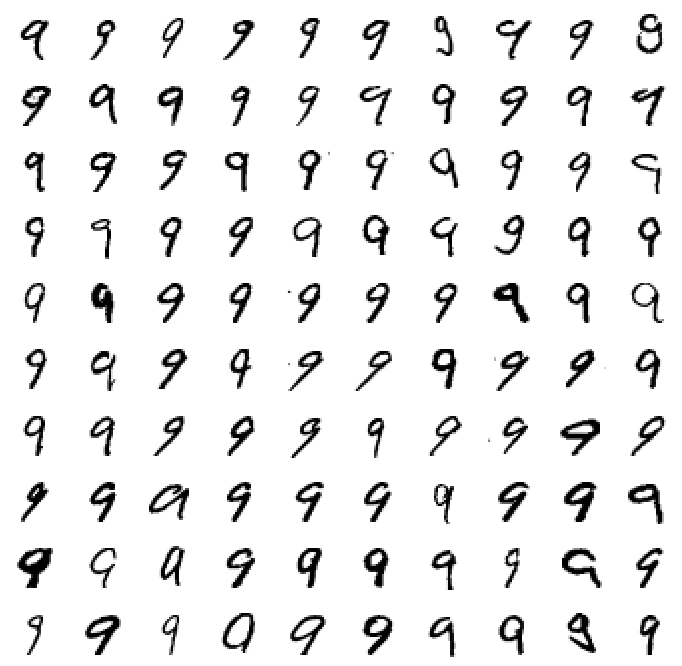

In [9]:
'for example, each row of X9  represents an image of a digit 9'
plt.figure(figsize=(12,12))
X9 = X_list[9]
for i in range(100):
    plt.subplot(10,10,i+1)
    image = X9[i].reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

In [10]:
'Compute the SVD of each matrix'
V_list = []
for i in range(10):
    U,D,V = np.linalg.svd(X_list[i])
    V_list.append(V)

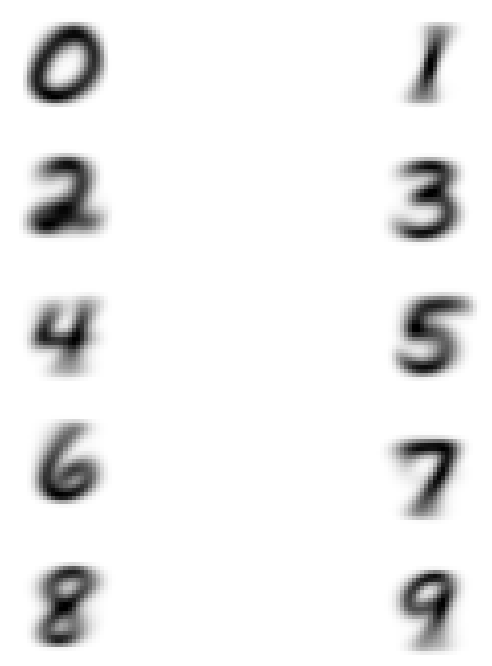

In [44]:
'first row of V'
plt.figure(figsize=(12,12))
for i in range(10):
    image = V_list[i][0].reshape(28,28)
    plt.subplot(5,2,i+1)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

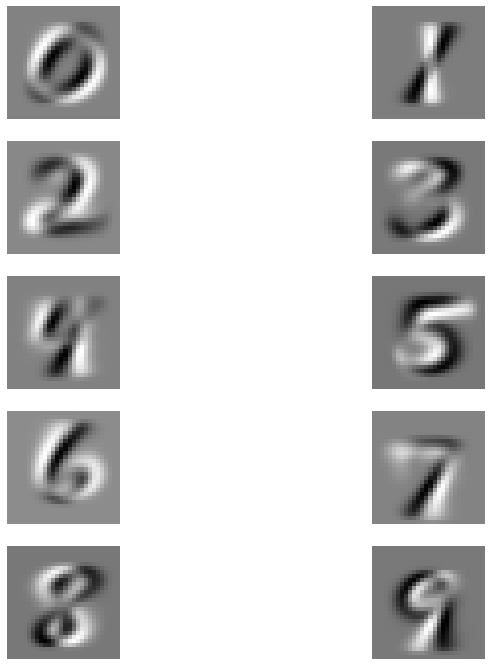

In [48]:
'second row of V'
plt.figure(figsize=(12,12))
for i in range(10):
    image = V_list[i][1].reshape(28,28)
    plt.subplot(5,2,i+1)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

In [119]:
Vk_list = []
k = 10
for i in range(10):
    Vk_list.append(V_list[i][:k]) #keep only the first k rows of V

In [120]:
'Classify an unknown digit'
unknown_digit = X_train[1234][None,:]

distances = np.zeros(10)
for i in range(10):
    orth = unknown_digit - unknown_digit@Vk_list[i].T@Vk_list[i]
    distances[i] = np.linalg.norm(orth)

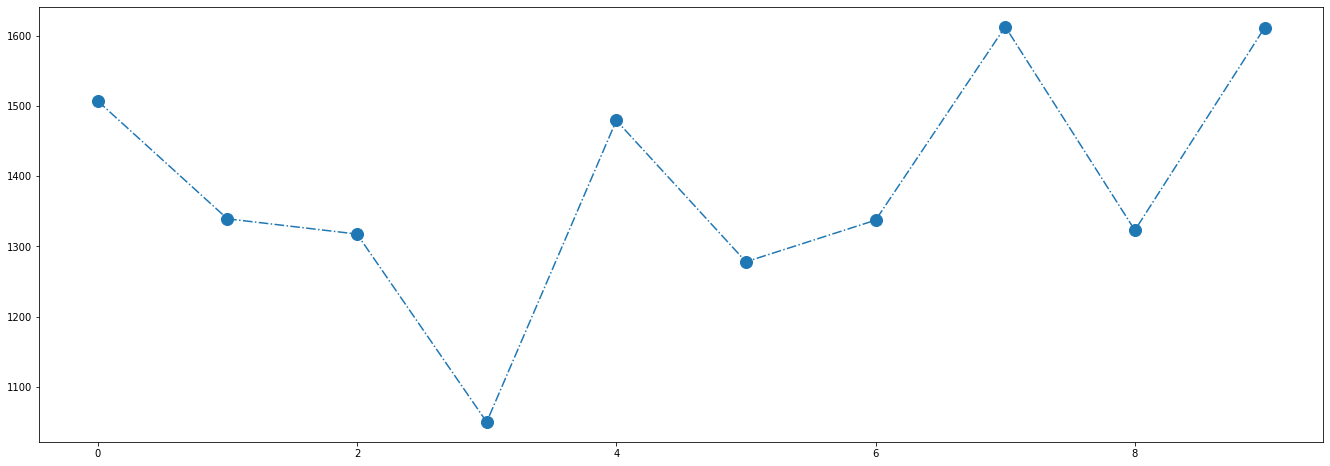

In [121]:
plt.figure(figsize=(23,8))
plt.plot(range(10),distances,'o-.',markersize=12)

In [122]:
np.argmin(distances)

3

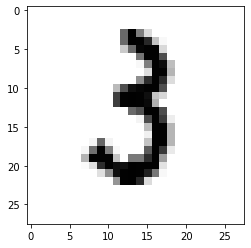

In [99]:
unknown_image = unknown_digit.reshape(28,28)
plt.imshow(unknown_image,cmap='binary')

# Choosing k

In [1]:
'classify the validation set using different values for k'
pct_incorrect = np.zeros((40,1))
k_list = [k+1 for k in range(40)]


for k in k_list: #k = 1,2,...,40
    
    'first k rows of the V matrices'
    Vk_list = []
    for i in range(10):
        Vk_list.append(V_list[i][:k])
    
    y_val_predicted = [] #initialize y_val_predicted
    'classify validation digits'
    for j in range(len(y_val)):
        unknown_digit = X_val[j,:]
        distances = np.zeros(10)
        'compute distances'
        for i in range(10):
            orth = unknown_digit - unknown_digit@Vk_list[i].T@Vk_list[i]
            distances[i] = np.linalg.norm(orth)            
        y_val_predicted.append(str(np.argmin(distances)))
        
    'percentage of incorrect classifications'
    num_incorrect = sum(y_val != y_val_predicted)
    pct_incorrect[k-1] = 100*num_incorrect/len(y_val)

NameError: name 'np' is not defined

Text(0.5, 1.0, 'Percentage of incorrect classifications')

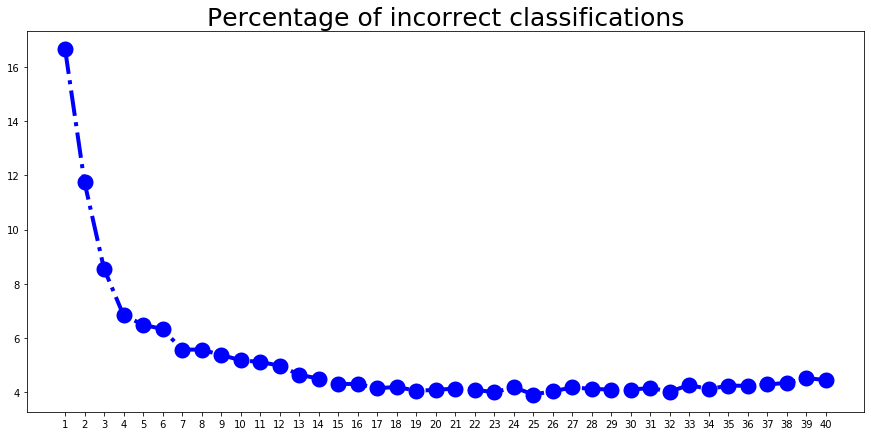

In [134]:
plt.figure(figsize=(15,7))
plt.plot(k_list,pct_incorrect,'bo-.',markeredgewidth=10,linewidth=4)
plt.xticks(k_list)
plt.title('Percentage of incorrect classifications',fontsize=25)

# Testing the SVD-classifier

In [11]:
k = 15
'first k rows of the V matrices'
Vk_list = []
for i in range(10):
    Vk_list.append(V_list[i][:k])
    
y_test_predicted = [] #initialize y_val_predicted
'classify validation digits'
for j in range(len(y_test)):
    unknown_digit = X_test[j,:]
    distances = np.zeros(10)
    'compute distances'
    for i in range(10):
        orth = unknown_digit - unknown_digit@Vk_list[i].T@Vk_list[i]
        distances[i] = np.linalg.norm(orth)            
    y_test_predicted.append(str(np.argmin(distances)))
y_test_predicted = np.array(y_test_predicted)

In [12]:
'confusion matrix'
C = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        C[i,j] = sum(y_test_predicted[y_test==str(i)]==str(j))
C.astype('int')

array([[ 966,    1,    0,    0,    0,    0,    9,    1,    3,    0],
       [   0, 1129,    3,    1,    0,    1,    0,    0,    1,    0],
       [  15,    4,  966,    6,    4,    0,    3,   12,   22,    0],
       [   7,    1,    6,  939,    0,   21,    3,    9,   19,    5],
       [   2,    8,    2,    0,  955,    0,    4,    1,    2,    8],
       [   8,    1,    1,   17,    0,  838,    9,    3,   11,    4],
       [   7,    4,    0,    0,    3,   13,  930,    0,    1,    0],
       [   0,   14,   17,    0,    4,    1,    0,  957,    1,   34],
       [   5,    6,    8,   13,    4,    9,    2,    4,  906,   17],
       [   8,    8,    4,   11,   12,    2,    0,   17,    6,  941]])

In [13]:
'percentage of correct classifications'
num_correct = sum(y_test == y_test_predicted)
100*num_correct/len(y_test)

95.27

In [35]:
'Let us have a look at the misclassified digits'
X_incorrect = X_test[np.logical_and(y_test == '7',y_test_predicted == '2')]
X_incorrect.shape

(17, 784)

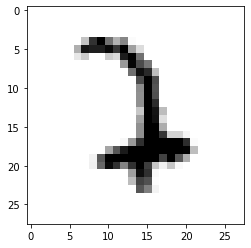

In [39]:
i = 0
image = X_incorrect[i].reshape(28,28)
plt.imshow(image,cmap = 'binary')